# Missing Values

In [75]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

data=pd.read_csv('Exercise-CarData.csv')

print('\n Data : \n',data)
print('\n\n Data statistics : ',data.describe())


 Data : 
       Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86       1.0          0  1300   
1435        1435   6950  76.0      1   Petrol  110       0.0          0  1600   

      Doors  Wei

In [76]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

print('\n Input : \n',X)
print('\n Output : \n',Y)


 Input : 
 [[0 13500 23.0 ... 0 2000 'three']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 nan ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]

 Output : 
 [1165 1165 1165 ... 1015 1015 1114]


In [77]:
data.dropna(axis=0,inplace=True,how="all")

print('\nNew Data : \n',data)


New Data : 
       Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86       1.0          0  1300   
1435        1435   6950  76.0      1   Petrol  110       0.0          0  1600   

      Doors  

In [78]:
up_data=data
data['Age']=up_data['Age'].fillna(up_data['Age'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1436 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 134.6+ KB


In [79]:
data=data.replace('??',np.nan)
data=data.replace('????',np.nan)
number_list=["zero","one","second","three","four","five","six","seven","eight","nine"]

for i in number_list:
    data=data.replace(i,number_list.index(i))

print(data)

      Unnamed: 0  Price        Age     KM FuelType   HP  MetColor  Automatic  \
0              0  13500  23.000000  46986   Diesel   90       1.0          0   
1              1  13750  23.000000  72937   Diesel   90       1.0          0   
2              2  13950  24.000000  41711   Diesel   90       NaN          0   
3              3  14950  26.000000  48000   Diesel   90       0.0          0   
4              4  13750  30.000000  38500   Diesel   90       0.0          0   
...          ...    ...        ...    ...      ...  ...       ...        ...   
1431        1431   7500  55.672156  20544   Petrol   86       1.0          0   
1432        1432  10845  72.000000    NaN   Petrol   86       0.0          0   
1433        1433   8500  55.672156  17016   Petrol   86       0.0          0   
1434        1434   7250  70.000000    NaN      NaN   86       1.0          0   
1435        1435   6950  76.000000      1   Petrol  110       0.0          0   

        CC Doors  Weight  
0     2000  

In [80]:
newX=data.iloc[:,:-1].values
newY=data.iloc[:,-1].values
#print("New X: \n",newX)
#print("\n new Y \n",newY)

imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer=imputer.fit(newX[:,1:4])
data.iloc[:,1:4]=imputer.transform(newX[:,1:4])
imputer=imputer.fit(newX[:,5:10])
data.iloc[:,5:10]=imputer.transform(newX[:,5:10])
data.info();
print(data);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   float64
 2   Age         1436 non-null   float64
 3   KM          1436 non-null   float64
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   float64
 6   MetColor    1436 non-null   float64
 7   Automatic   1436 non-null   float64
 8   CC          1436 non-null   float64
 9   Doors       1436 non-null   float64
 10  Weight      1436 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 134.6+ KB
      Unnamed: 0    Price        Age            KM FuelType     HP  MetColor  \
0              0  13500.0  23.000000  46986.000000   Diesel   90.0  1.000000   
1              1  13750.0  23.000000  72937.000000   Diesel   90.0  1.000000   
2              2  13950.0  24.000000  41711.000000   Die

In [81]:
data.dropna(axis=0,inplace=True,how="any")
data.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1336 non-null   int64  
 1   Price       1336 non-null   float64
 2   Age         1336 non-null   float64
 3   KM          1336 non-null   float64
 4   FuelType    1336 non-null   object 
 5   HP          1336 non-null   float64
 6   MetColor    1336 non-null   float64
 7   Automatic   1336 non-null   float64
 8   CC          1336 non-null   float64
 9   Doors       1336 non-null   float64
 10  Weight      1336 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 125.2+ KB
      Unnamed: 0    Price        Age            KM FuelType     HP  MetColor  \
0              0  13500.0  23.000000  46986.000000   Diesel   90.0  1.000000   
1              1  13750.0  23.000000  72937.000000   Diesel   90.0  1.000000   
2              2  13950.0  24.000000  41711.000000   Die

# Data Transformation

In [82]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

x=data.iloc[:,:-1].values
newx=data.iloc[:,1:4].values
print("newx : \n",newx)
scaler=MinMaxScaler()
minx=scaler.fit_transform(newx)
print("scaled \n",minx)
#scaler=StandardScaler()
#stdx=scaler.fit_transform(newx)
#print("Standard Scaler :\n",stdx)

newy=data.iloc[:,5:10].values
print("newy : \n",newx)
scaler=MinMaxScaler()
miny=scaler.fit_transform(newy)
print("scaled \n",miny)
#scaler=StandardScaler()
#stdy=scaler.fit_transform(maxy)
#print("Standard Scaler :\n",stdy)

data.iloc[:,1:4]=minx
data.iloc[:,5:10]=miny

print("data : \n",data)

newx : 
 [[1.35000000e+04 2.30000000e+01 4.69860000e+04]
 [1.37500000e+04 2.30000000e+01 7.29370000e+04]
 [1.39500000e+04 2.40000000e+01 4.17110000e+04]
 ...
 [1.08450000e+04 7.20000000e+01 6.86472400e+04]
 [8.50000000e+03 5.56721557e+01 1.70160000e+04]
 [6.95000000e+03 7.60000000e+01 1.00000000e+00]]
scaled 
 [[0.33983287 0.27848101 0.19335471]
 [0.34911792 0.27848101 0.30014938]
 [0.35654596 0.29113924 0.1716468 ]
 ...
 [0.24122563 0.89873418 0.28249598]
 [0.15413185 0.6920526  0.07002086]
 [0.09656453 0.94936709 0.        ]]
newy : 
 [[1.35000000e+04 2.30000000e+01 4.69860000e+04]
 [1.37500000e+04 2.30000000e+01 7.29370000e+04]
 [1.39500000e+04 2.40000000e+01 4.17110000e+04]
 ...
 [1.08450000e+04 7.20000000e+01 6.86472400e+04]
 [8.50000000e+03 5.56721557e+01 1.70160000e+04]
 [6.95000000e+03 7.60000000e+01 1.00000000e+00]]
scaled 
 [[0.17073171 1.         0.         1.         0.33333333]
 [0.17073171 1.         0.         1.         0.33333333]
 [0.17073171 0.67496112 0.         1. 

# Handling Categorial Data

In [86]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
newx=data.iloc[:,:-1].values
label=LabelEncoder()
print("real Data \n",newx)
data.iloc[:,4]=label.fit_transform(newx[:,4])
print("Encoder data \n",data)
print("\n",data.info())

real Data 
 [[0 0.33983286908078003 0.27848101265822783 ... 0.0 1.0
  0.33333333333333337]
 [1 0.3491179201485609 0.27848101265822783 ... 0.0 1.0
  0.33333333333333337]
 [2 0.35654596100278557 0.2911392405063291 ... 0.0 1.0
  0.33333333333333337]
 ...
 [1432 0.2412256267409471 0.8987341772151899 ... 0.0 0.0
  0.33333333333333337]
 [1433 0.15413184772516253 0.6920526036534526 ... 0.0 0.0
  0.33333333333333337]
 [1435 0.09656453110492108 0.949367088607595 ... 0.0 0.4285714285714284
  0.9999999999999999]]
Encoder data 
       Unnamed: 0     Price       Age        KM  FuelType        HP  MetColor  \
0              0  0.339833  0.278481  0.193355         1  0.170732  1.000000   
1              1  0.349118  0.278481  0.300149         1  0.170732  1.000000   
2              2  0.356546  0.291139  0.171647         1  0.170732  0.674961   
3              3  0.393686  0.316456  0.197528         1  0.170732  0.000000   
4              4  0.349118  0.367089  0.158433         1  0.170732  0.000000 

In [64]:
temp_data=data
dummy = pd.get_dummies(temp_data['FuelType'])
print("\n\nDummy :\n",dummy)
temp_data = temp_data.drop(['FuelType','Weight'],axis=1)
temp_data = pd.concat([temp_data,dummy],axis=1)
print("\n\FuelType Data :\n",temp_data)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1430    0       0       1
1431    0       0       1
1432    0       0       1
1433    0       0       1
1435    0       0       1

[1336 rows x 3 columns]

\FuelType Data :
       Unnamed: 0     Price       Age        KM        HP  MetColor  Automatic  \
0              0  0.339833  0.278481  0.193355  0.170732  1.000000        0.0   
1              1  0.349118  0.278481  0.300149  0.170732  1.000000        0.0   
2              2  0.356546  0.291139  0.171647  0.170732  0.674961        0.0   
3              3  0.393686  0.316456  0.197528  0.170732  0.000000        0.0   
4              4  0.349118  0.367089  0.158433  0.170732  0.000000        0.0   
...          ...       ...       ...       ...       ...       ...        ...   
1430        1430  0.152275  1.000000  0.094646  0.138211  0.000000

In [83]:
datasets=data
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(datasets.FuelType.values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(x, columns = ["FuelType_"+str(int(i)) for i in range(3)]) 
df = pd.concat([datasets, dfOneHot], axis=1) 
df= df.drop(['FuelType'], axis=1) 
print(df.head())

   Unnamed: 0     Price       Age        KM        HP  MetColor  Automatic  \
0         0.0  0.339833  0.278481  0.193355  0.170732  1.000000        0.0   
1         1.0  0.349118  0.278481  0.300149  0.170732  1.000000        0.0   
2         2.0  0.356546  0.291139  0.171647  0.170732  0.674961        0.0   
3         3.0  0.393686  0.316456  0.197528  0.170732  0.000000        0.0   
4         4.0  0.349118  0.367089  0.158433  0.170732  0.000000        0.0   

    CC     Doors  Weight  FuelType_0  FuelType_1  FuelType_2  
0  1.0  0.333333  1165.0         0.0         1.0         0.0  
1  1.0  0.333333  1165.0         0.0         1.0         0.0  
2  1.0  0.333333  1165.0         0.0         1.0         0.0  
3  1.0  0.333333  1165.0         0.0         1.0         0.0  
4  1.0  0.333333  1170.0         0.0         1.0         0.0  


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1336 non-null   float64
 1   Price       1336 non-null   float64
 2   Age         1336 non-null   float64
 3   KM          1336 non-null   float64
 4   HP          1336 non-null   float64
 5   MetColor    1336 non-null   float64
 6   Automatic   1336 non-null   float64
 7   CC          1336 non-null   float64
 8   Doors       1336 non-null   float64
 9   Weight      1336 non-null   float64
 10  FuelType_0  1336 non-null   float64
 11  FuelType_1  1336 non-null   float64
 12  FuelType_2  1336 non-null   float64
dtypes: float64(13)
memory usage: 156.1 KB


# Feature Selaction and correction

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns

data.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,0.339833,0.278481,0.193355,1,0.170732,1.000000,0.0,1.0,0.333333,1165
1,1,0.349118,0.278481,0.300149,1,0.170732,1.000000,0.0,1.0,0.333333,1165
2,2,0.356546,0.291139,0.171647,1,0.170732,0.674961,0.0,1.0,0.333333,1165
3,3,0.393686,0.316456,0.197528,1,0.170732,0.000000,0.0,1.0,0.333333,1165
4,4,0.349118,0.367089,0.158433,1,0.170732,0.000000,0.0,1.0,0.333333,1170


In [73]:
newx=data.iloc[:,:-1]
newx.head()
corr=newx.corr()
corr.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors
Unnamed: 0,1.000000,-0.737817,0.873736,0.277111,0.149157,-0.109182,-0.086281,0.063540,-0.171780,-0.125308
Price,-0.737817,1.000000,-0.856291,-0.573075,0.003437,0.319942,0.121372,0.039874,0.137370,0.186280
Age,0.873736,-0.856291,1.000000,0.494787,0.057677,-0.154949,-0.099351,0.030335,-0.103787,-0.152864
KM,0.277111,-0.573075,0.494787,1.000000,-0.435023,-0.337670,-0.094019,-0.074760,0.306401,-0.049786
FuelType,0.149157,0.003437,0.057677,-0.435023,1.000000,0.418036,0.008008,0.084989,-0.651491,-0.018882


<AxesSubplot:>

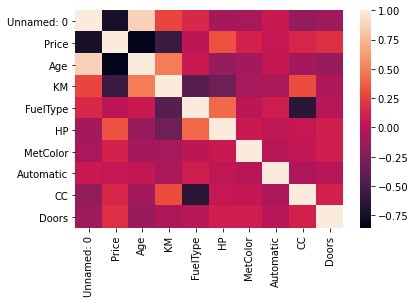

In [44]:
sns.heatmap(corr)

In [74]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = newx.columns[columns]
selected_columns.shape


(10,)

In [47]:
data = newx[selected_columns]
print(data)

      Unnamed: 0     Price       Age        KM  FuelType        HP  MetColor  \
0              0  0.339833  0.278481  0.193355         1  0.170732  1.000000   
1              1  0.349118  0.278481  0.300149         1  0.170732  1.000000   
2              2  0.356546  0.291139  0.171647         1  0.170732  0.674961   
3              3  0.393686  0.316456  0.197528         1  0.170732  0.000000   
4              4  0.349118  0.367089  0.158433         1  0.170732  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
1430        1430  0.152275  1.000000  0.094646         2  0.138211  0.000000   
1431        1431  0.116992  0.692053  0.084539         2  0.138211  1.000000   
1432        1432  0.241226  0.898734  0.282496         2  0.138211  0.000000   
1433        1433  0.154132  0.692053  0.070021         2  0.138211  0.000000   
1435        1435  0.096565  0.949367  0.000000         2  0.333333  0.000000   

      Automatic        CC     Doors  
0